## Calcular Distancias de Escuelas a establecimientos que venden alcohol mas cercanos

# Chequen los PATHS 

Primero se importan los scripts y scipy

In [1]:

from scripts.schools import main as compute_schools
from scripts.alcohol import main as compute_alcohol
from scripts.salud import main as compute_salud
from scipy.spatial import KDTree
import pandas as pd


# Seccion de PATHS

In [3]:
# Lista de rutas de archivos Negocios DENUE
paths_negocios_denue = [
    # AQUI AGREGUEN LOS PATHS DE SUS CSVs
    '/home/jay/repos/AI/feminicidios/denue_00_46111_csv/conjunto_de_datos/denue_inegi_46111_.csv',
    '/home/jay/repos/AI/feminicidios/denue_00_46112-46311_csv/conjunto_de_datos/denue_inegi_46112-46311_.csv',
    '/home/jay/repos/AI/feminicidios/denue_00_46321-46531_csv/conjunto_de_datos/denue_inegi_46321-46531_.csv',
    '/home/jay/repos/AI/feminicidios/denue_00_46591-46911_csv/conjunto_de_datos/denue_inegi_46591-46911_.csv',
    
    # Sin querer puse el PATH de las escuelas, xd que bueno que despues de get_alcohol() el DF estaba vacio
    # Lo deje para debuggear
    # '/home/jay/repos/AI/feminicidios/denue_00_61_csv/conjunto_de_datos/denue_inegi_61_.csv'
]

# Ruta de archivo Escuelas DENUE
file_path_escuelas = '/home/jay/repos/AI/feminicidios/denue_00_61_csv/conjunto_de_datos/denue_inegi_61_.csv'

# Ruta de archivo salud DENUE
file_path_salud = '/home/jay/repos/GeoStats/denue/denue_00_62_csv/conjunto_de_datos/denue_inegi_62_.csv'

# Ahora se van a importar los DF de los negocios que venden alcohol y las escuelas

In [4]:
# Se itera sobre la lista de PATHS, la verdad no se por que imprime
alcohol_establishments = compute_alcohol(paths_negocios_denue)

In [5]:
# Se carga el DF dado un solo PATH
schools = compute_schools(file_path_escuelas)

In [10]:
# Se carga el DF dado un solo PATH
salud = compute_salud(file_path_salud)

        id                          clee              nom_estab  \
0      536  01003624191000011001000000U3    AA GRUPO CHICAGO 85   
1  8625042  01001624191002591000000000U6    AA GRUPO LA SOLEDAD   
2    16651  01001624191000421001000000U8     AA GRUPO PRIMAVERA   
3  8463387  01001624211000123000000000U6  ABASTOS Y OPERACIONES   
4  8984759  01001623311000112000000000U8      ABUELITOS FELICES   

                                      raz_social  codigo_act  \
0                                            NaN      624191   
1  CENTRAL MEXICANA DE SERVICIOS GENERALES AA AC      624191   
2                          AA GRUPO PRIMAVERA AC      624191   
3                 ABASTOS Y OPERACIONES SA DE CV      624211   
4                     ABUELITOS FELICES S DE SS       623311   

                                          nombre_act           per_ocu  \
0  Agrupaciones de autoayuda para alcohólicos y p...  11 a 30 personas   
1  Agrupaciones de autoayuda para alcohólicos y p...    0 a 5 pe

## EDA

In [11]:
alcohol_establishments.head()

,id,nom_estab,nombre_act,latitud,longitud
0,8794778,7 ELEVEN,"Comercio al por menor en tiendas de abarrotes,...",25.752659,-100.198830
1,9346815,7 ELEVEN MEXICO,"Comercio al por menor en tiendas de abarrotes,...",25.685572,-100.474568
2,2962357,AB. ESMERALDA,"Comercio al por menor en tiendas de abarrotes,...",25.733921,-100.386254
3,3019167,ABA FRUT LA ROSITA,"Comercio al por menor en tiendas de abarrotes,...",25.685544,-100.410971
4,7350331,ABARR0TES FLORES,"Comercio al por menor en tiendas de abarrotes,...",25.754152,-100.106617


In [12]:
schools.head()


,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,46594,01001611122002634000000000U4,2010 BICENTENARIO DE LA INDEPENDENCIA DE MEXIC...,INSTITUTO DE EDUCACION DE AGUASCALIENTES,611122,Escuelas de educación primaria del sector público,31 a 50 personas,CALLE,SEBASTIAN DE LARA,AVENIDA,...,Aguascalientes,3539,3,NaN,NaN,NaN,Fijo,21.931757,-102.255818,2014-12
1,8624796,01001713943003871000000000U7,ACADEMA BLACK DEMON,NaN,611621,Escuelas de deporte del sector privado,0 a 5 personas,CALLE,TALAMANTES,AVENIDA,...,Aguascalientes,0591,19,4.494338e+09,NaN,NaN,Fijo,21.879529,-102.312719,2019-11
2,9113033,01001611621001461000000000U4,ACADEMIA DE ARTES MARCIALES,NaN,611621,Escuelas de deporte del sector privado,0 a 5 personas,ANDADOR,NINGUNO,AVENIDA,...,Aguascalientes,2460,48,NaN,NaN,NaN,Fijo,21.868127,-102.270112,2019-11
3,7461715,01011611611000011000000000U8,ACADEMIA DE BAILDE YL DANCE,NaN,611611,Escuelas de arte del sector privado,0 a 5 personas,AVENIDA,CONSTITUCION,CALLE,...,Ex-Viñedos Guadalupe ...,0136,4,4.493916e+09,NaN,NaN,Fijo,21.958495,-102.271889,2019-11
4,45184,01001722519003621010000000U3,ACADEMIA DE BAILE BAILA CON LES,NaN,611611,Escuelas de arte del sector privado,0 a 5 personas,PRIVADA,CULTURA MAYA 120,AVENIDA,...,Aguascalientes,3191,4,4.492731e+09,NaN,NaN,Fijo,21.907149,-102.243783,2014-12


In [13]:
salud.head()

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,sector
0,536,01003624191000011001000000U3,aa grupo chicago 85,NaN,624191,agrupaciones de autoayuda para alcoholicos y p...,11 a 30 personas,CALLE,ABASOLO,CALLE,...,0187,24,4951077786,NaN,NaN,Fijo,21.845172,-102.722171,2010-07,otro
1,8625042,01001624191002591000000000U6,aa grupo la soledad,central mexicana de servicios generales aa ac,624191,agrupaciones de autoayuda para alcoholicos y p...,0 a 5 personas,CALLE,ATOTONILCO,CALLE,...,2846,15,NaN,NaN,NaN,Fijo,21.877198,-102.333976,2019-11,otro
2,16651,01001624191000421001000000U8,aa grupo primavera,aa grupo primavera ac,624191,agrupaciones de autoayuda para alcoholicos y p...,6 a 10 personas,CALLE,ALAMO,CALLE,...,0464,8,NaN,NaN,NaN,Fijo,21.893899,-102.295940,2010-07,otro
3,8463387,01001624211000123000000000U6,abastos y operaciones,abastos y operaciones sa de cv,624211,servicios de alimentacion comunitarios prestad...,11 a 30 personas,CALLE,INDUSTRIA,AVENIDA,...,198A,4,NaN,ABASTOSYOPERACION@GMAIL.COM,NaN,Fijo,21.905559,-102.290243,2019-11,privado
4,8984759,01001623311000112000000000U8,abuelitos felices,abuelitos felices s de ss,623311,asilos y otras residencias del sector privado ...,6 a 10 personas,PRIVADA,VALLE DE GUADALUPE,CALLE,...,2278,17,NaN,NaN,NaN,Fijo,21.910645,-102.304349,2019-11,privado


In [14]:
alcohol_establishments.describe() # no aplica porque no hay datos numericos
schools.describe() # no aplica porque no hay datos numericos
salud.describe() # no aplica porque no hay datos numericos

,id,codigo_act,numero_ext,numero_int,cod_postal,cve_ent,cve_mun,cve_loc,manzana,latitud,longitud
count,2.194960e+05,219496.000000,172063.000000,77273.000000,217752.000000,219496.000000,219496.000000,219496.000000,219496.000000,219496.000000,219496.000000
mean,4.849920e+06,621788.332530,706.760332,87.888072,54032.570364,16.281755,48.478223,8.987968,19.509417,21.376179,-100.603338
std,3.095145e+06,1172.698518,1750.596235,648.831276,26276.740640,8.001849,62.819616,62.157786,30.434000,3.759831,5.114725
min,1.300000e+01,621111.000000,0.000000,0.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,14.590784,-117.123889
25%,2.003884e+06,621113.000000,23.000000,0.000000,33800.000000,9.000000,12.000000,1.000000,8.000000,19.292412,-102.463724
50%,4.138574e+06,621211.000000,150.000000,0.000000,55555.000000,15.000000,30.000000,1.000000,16.000000,19.986436,-99.585078
75%,7.974451e+06,621398.000000,601.000000,6.000000,76000.000000,22.000000,61.000000,1.000000,26.000000,22.158419,-98.433591
max,9.470742e+06,624412.000000,78107.000000,92137.000000,99980.000000,32.000000,570.000000,7001.000000,800.000000,32.718237,-86.725834


In [15]:
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')

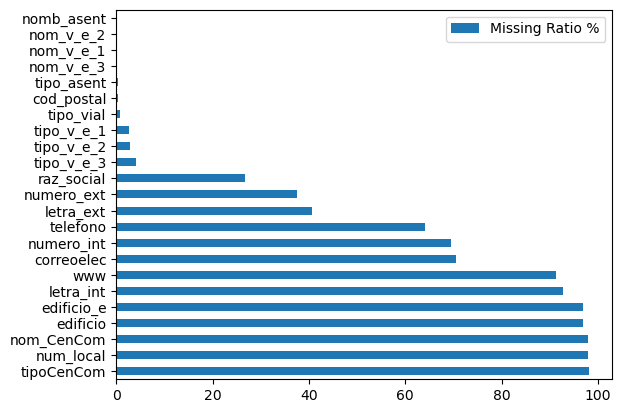

In [16]:

plot_nas(schools)

In [17]:
plot_nas(alcohol_establishments) # No NA's found

No NAs found


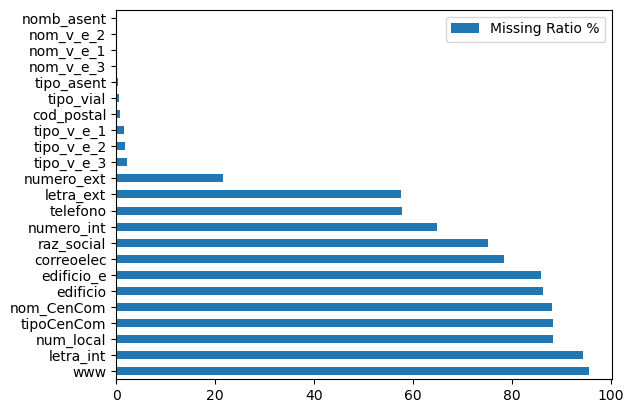

In [18]:
plot_nas(salud) 

In [20]:
# Numero total de variables de salud por sector
salud['sector'].value_counts()

privado     172613
publico      23843
otro         16694
hospital      6346
Name: sector, dtype: int64

# Todavia no queda, esta en testing
## Se crea un KDTree
## Se guarda el indice y la distancia del establecimiento mas cercano a la escuela

In [24]:
# Encuentra el establecimiento más cercano a una coordenada dado un arbol de KDTree
def find_nearest(row, tree, establishments):
    distance, index = tree.query([row['latitud'], row['longitud']])
    return establishments.iloc[index]['nom_estab'], distance

# Tree para aplicar busqueda 
alcohol_tree = KDTree(alcohol_establishments[['latitud', 'longitud']])

# simon
schools['nearest_alcohol'], schools['distance_to_nearest_alcohol'] = zip(*schools.apply(lambda row: find_nearest(row, alcohol_tree, alcohol_establishments), axis=1))
